#**THE SPARKS FOUNDATION**

#**Graduate Rotational Internship Program**

##***Data Science And Business Analytics Tasks***

###**Author: Akash Jain**


##**Prediction Using Supervised ML**

###Predict the percentage of a student based on the no. of study hours
* This is a simple linear regression task as it involves only 2 variables.
* Dataset can be found at http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/day?



In [1]:
# Simple linear regression
# It is a supervised machine learning model where the model finds a linear relationship between the single independent variable (x)
# and the single output(dependent) variable (y) using a best fit straight line .

#Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


# Load the data and store it in df dataframe


In [3]:
df=pd.read_csv('http://bit.ly/w-data')

# Display first 5 rows of the dataset


In [4]:
df.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Check no of rows and columns in the dataset


In [5]:
df.shape 

(25, 2)

There are 25 rows and 2 columns in the dataframe

# Check if there are missing values on any columns and their data type


In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

No missing values in the dataframe

# Display the full summary of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


* A student can get minimum score to be 17 and maximum score to be 95 
* An observation to be made that no student in the dataset studied less than 1 hour.
* A student can study minimum 1 hour and maximum study for 9 hour 20 minutes 


# Correlation 

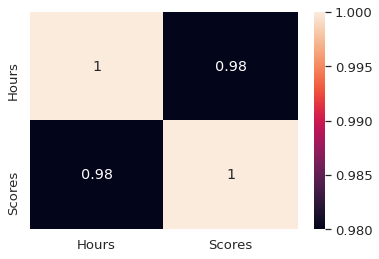

In [9]:
#create a heatmap to demonstrate the correlation magnitude among the variables
corr=df.corr().round(2)
sn.set(font_scale=1.2)
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True) 
#annot argument writes the data value into each cell 
#fmt parameter add text to the heatmap cell and formats the cell values

98% correlation between Hours and Scores

# Data Visualization

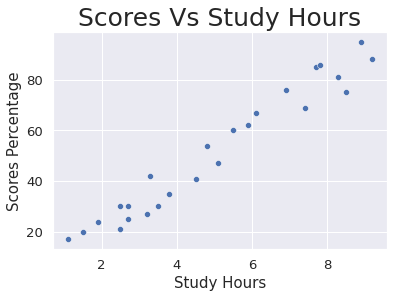

In [10]:
#check the scatterplot of the dataset
sn.set_style('darkgrid')
sn.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Scores Vs Study Hours',size=25)
plt.ylabel('Scores Percentage', size=15)
plt.xlabel('Study Hours', size=15)
plt.show()

* The plot shows that there is a linear curve between Hours and 
Scores so we get the idea to use linear regression.
* So we try to plot a regression line to find out relationship between variables.

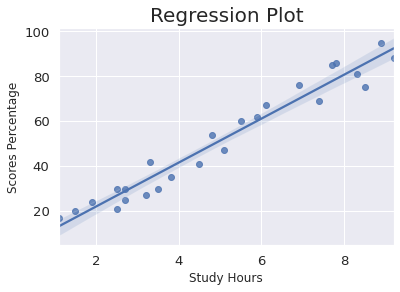

In [11]:
# plot a regressionplot to display the regression line
sn.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Scores Percentage', size=12)
plt.xlabel('Study Hours', size=12)
plt.show()

#Preparing the data

In [12]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

#Splitting the data using Scikit-Learn built in train_test_split() method

In [13]:
train_X, test_X, train_y ,test_y= train_test_split(X, y,random_state = 0)

#Train the data with linear regression model 

In [14]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Check parameters of trained data

In [15]:
# Intercept and slope of the regrssion line
print(model.intercept_)
print(model.coef_)

1.9322042531516601
[9.94167834]


#Model Accuracy

In [16]:
accuracy=model.score(train_X, train_y).round(2)*100
accuracy

95.0

#Predicting Values for test data

In [17]:
pred_percent = model.predict(test_X)
prediction_table = pd.DataFrame({'Study Hours': [i[0] for i in test_X], 'Predicted_Scores': [k for k in pred_percent]})
prediction_table

,Study Hours,Predicted_Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


#Compare Actual Scores and Predicted Scores in percentage

In [18]:
cmp_scores = pd.DataFrame({'Actual_Scores': test_y, 'Predicted_Scores': pred_percent})
cmp_scores

,Actual_Scores,Predicted_Scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


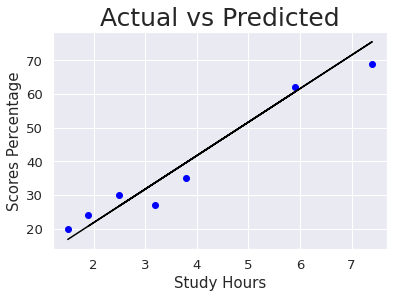

In [19]:
#plotting Graph 
plt.scatter(x=test_X, y=test_y, color='blue')
plt.plot(test_X, pred_percent, color='Black')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Scores Percentage', size=15)
plt.xlabel('Study Hours', size=15)
plt.show()

#Error Determination


In [20]:
# Calculating Mean Absolute Error
print('Mean absolute error: ',metrics.mean_absolute_error(test_y,pred_percent))
#Calculating R2 Score
print('Coefficient of Determination: ',metrics.r2_score(test_y,pred_percent))
# Calculating Mean Squared Error
print('Mean squared error',np.sqrt(metrics.mean_squared_error(test_y,pred_percent)))


Mean absolute error:  4.130879918502482
Coefficient of Determination:  0.9367661043365056
Mean squared error 4.509204328368805


* As Mean absolute error & Mean squared error values are lower and R2 score value is high so it means the efficiency is good and prediction is Efficient



#Solving Problem Statement
* What will be predicted score if a student studies for 9.25 hrs/day?

In [21]:
hours = [9.25]
ans = model.predict([hours])
print(*ans.round(2))

93.89


#We can conclude that  if a student studies for 9.25 hours a day he is likely to score 93.89 Percentage.

Task Completed Successfully!